In [4]:
# ==========================================================
# Maestría en Ciencia y Análisis de Datos
# Universidad Mayor de San Andrés
# ----------------------------------------------------------
#           Machine Learning y Deep Learning
# ----------------------------------------------------------
#        Rolando Gonzales Martinez, Agosto 2024
# ==========================================================
#    Identificacion de anomalias y tratamiento de datos
# ==========================================================
import pandas as pandita
from scipy import stats
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

In [6]:
# Cargar el conjunto de datos:
url = 'https://raw.githubusercontent.com/rogon666/UMSA/main/AIMLDL/Datos/salarios.csv'

# Cargar los datos en un DataFrame
df= pandita.read_csv(url)

# Mostrar las primeras filas del DataFrame
print(df.head())

   salario  educacion  edad  antiguedad  ventas_valor_empresa
0      873         11    41           2              0.262787
1     1336         13    60          21              1.046512
2     7284         13    54          32              0.627551
3     1170         12    57           9              0.339286
4      600         10    43          10              0.257273


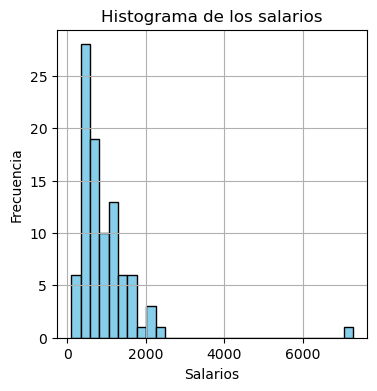

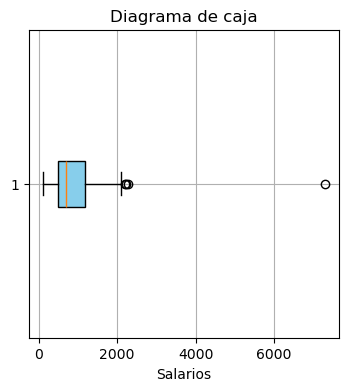

In [8]:
# Graficos
plt.figure(figsize=(4, 4))
plt.hist(df['salario'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histograma de los salarios')
plt.xlabel('Salarios')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.boxplot(df['salario'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Diagrama de caja')
plt.xlabel('Salarios')
plt.grid(True)
plt.show()

In [10]:
# Features de la base de datos
features = df[['salario', 'educacion', 'edad', 'antiguedad', 'ventas_valor_empresa']]

# Isolation Forest
grado_de_contaminacion = 0.01
iso_forest = IsolationForest(contamination= grado_de_contaminacion)
# contamination: proporcion esperada de anomalias (outliers)

df['iso_forest_anomaly'] = iso_forest.fit_predict(features)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, 
                         contamination=grado_de_contaminacion)
# Un número bajo de vecinos hace al modelo más sensible a anomalias especificas
df['lof_anomaly'] = lof.fit_predict(features)

# Resultados
df['iso_forest_anomaly'] = df['iso_forest_anomaly'].map({1: 'Normal', -1: 'Anomaly'})
df['lof_anomaly'] = df['lof_anomaly'].map({1: 'Normal', -1: 'Anomaly'})
df[['salario', 'iso_forest_anomaly', 'lof_anomaly']].head()

,salario,iso_forest_anomaly,lof_anomaly
0,873,Normal,Normal
1,1336,Normal,Normal
2,7284,Anomaly,Anomaly
3,1170,Normal,Normal
4,600,Normal,Normal


In [12]:
# Función para aplicar el test de Grubbs
def grubbs_test(data, alpha=0.05):
    """
    Aplica el test de Grubbs para detectar un outlier en un conjunto de datos.
    :param data: Lista o array de datos
    :param alpha: Nivel de significancia (típicamente 0.05)
    :return: Si se encuentra un outlier, se muestra el valor y su índice.
    """
    n = len(data)
    mean_data = np.mean(data)
    std_data = np.std(data, ddof=1)
    
    G = np.max(np.abs(data - mean_data)) / std_data
    t_dist = stats.t.ppf(1 - alpha / (2 * n), n - 2)
    threshold = ((n - 1) / np.sqrt(n)) * np.sqrt(t_dist**2 / (n - 2 + t_dist**2))
    
    if G > threshold:
        outlier_index = np.argmax(np.abs(data - mean_data))
        return f"Outlier encontrado: Valor = {data[outlier_index]}, Índice (posicion en los datos) = {outlier_index}"
    else:
        return "No se encontró ningún outlier significativo"

# Aplicando el test de Grubbs a la columna de salarios
resultado = grubbs_test(df['salario'].values)
resultado


'Outlier encontrado: Valor = 7284, Índice (posicion en los datos) = 2'

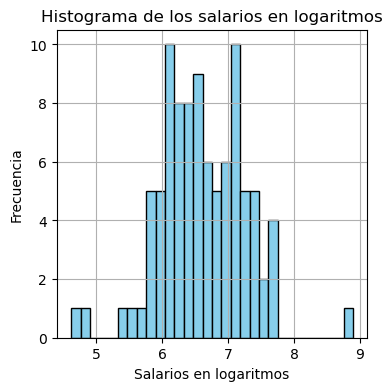

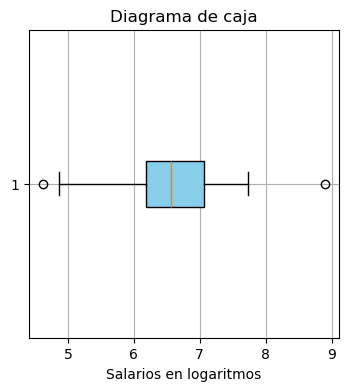

In [14]:
# Ejemplo de transformación logarítmica
df['salario_log'] = np.log(df['salario'] + 1)  # +1 para evitar log(0)

plt.figure(figsize=(4, 4))
plt.hist(df['salario_log'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histograma de los salarios en logaritmos')
plt.xlabel('Salarios en logaritmos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.boxplot(df['salario_log'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Diagrama de caja')
plt.xlabel('Salarios en logaritmos')
plt.grid(True)
plt.show()

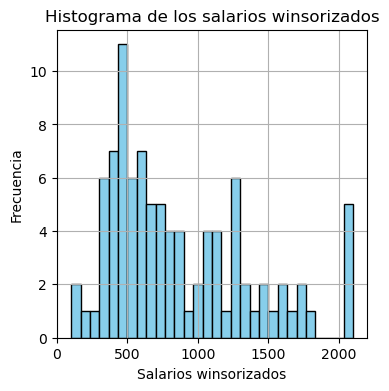

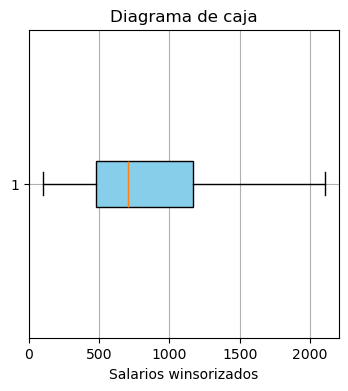

In [16]:
# Ejemplo de winsorización
df['salario_winsorizado'] = winsorize(df['salario'], limits=[0.01, 0.05])

plt.figure(figsize=(4, 4))
plt.hist(df['salario_winsorizado'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histograma de los salarios winsorizados')
plt.xlabel('Salarios winsorizados')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.boxplot(df['salario_winsorizado'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Diagrama de caja')
plt.xlabel('Salarios winsorizados')
plt.grid(True)
plt.show()